In [2]:
!pip install mlrose-hiive

     |████████████████████████████████| 51kB 1.5MB/s 
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.1.3-cp36-none-any.whl size=96601 sha256=019d1198b6de531078c0bc3b737eeb4d7a17bd65b96fce6455760450c9ef8a1f
  Stored in directory: /root/.cache/pip/wheels/ee/ef/8b/941402c2014649279f68a1ed4a37b4d15142dfb9c7e4a6b7ac
Successfully built mlrose-hiive


In [2]:
from mlrose_hiive import NeuralNetwork
from sklearn.metrics import accuracy_score
import csv
import pandas as pd
import time
import json

In [24]:
from mlrose_hiive.algorithms.decay import GeomDecay

def run_neural_network_sa(X_train, y_train, X_test, y_test):
    hidden_nodes = [100, 50, 100]
    results = {}

    for decay in [0.99, 0.95, 0.75, 0.5, 0.4]:
        print("Decay", decay)
        schedule = GeomDecay(init_temp=10, decay=decay)
        start = time.time()
        model = NeuralNetwork(hidden_nodes=hidden_nodes, schedule=schedule, algorithm='simulated_annealing', 
                              max_iters=10000, early_stopping=True, random_state=7, curve=True)
        model.fit(X_train, y_train)
        end = time.time()
        y_act = model.predict(X_test)
        results[decay] = {
            'loss': model.loss, 
            'curve': model.fitness_curve.tolist(),
            'accuracy': accuracy_score(y_act, y_test),
            'time': end-start
        }
        
    with open("SA.json", "w+") as f:
        json.dump(results, f, indent=4)



In [25]:
from scipy.io.arff import loadarff 
from sklearn.model_selection import train_test_split

raw_data = loadarff('Training Dataset.arff')
ph_data = pd.DataFrame(raw_data[0])

for var in ph_data.columns.values:
    ph_data[var] = pd.Categorical(ph_data[var])
    ph_data[var] = ph_data[var].cat.codes


y = ph_data.Result.values
X = ph_data.drop(['Result'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

run_neural_network_sa(X_train, y_train, X_test, y_test)

Decay 0.99
Decay 0.95
Decay 0.75
Decay 0.5
Decay 0.4


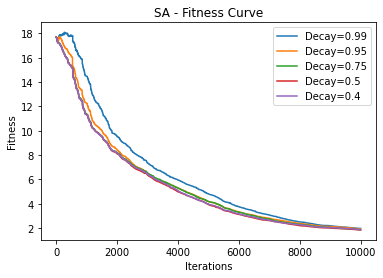

In [33]:
import matplotlib.pyplot as plt

results = None        
with open("SA.json") as f:
    results = json.load(f)

fig, ax = plt.subplots()
ax.set_title("SA - Fitness Curve")
ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness")
for decay, stats in results.items():
    ax.plot(stats['curve'], label="Decay={}".format(decay))

plt.savefig("SA_Curve.png")
plt.legend(loc="best")

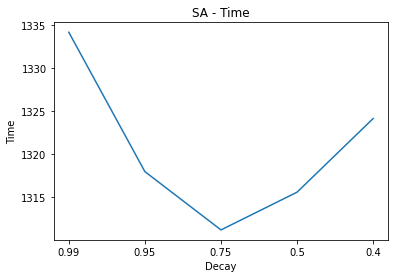

In [43]:
results = None        
with open("SA.json") as f:
    results = json.load(f)

fig, ax = plt.subplots()
ax.set_title("SA - Time")
ax.set_xlabel("Decay")
ax.set_ylabel("Time")
decays = []
times = []
for decay, stats in results.items():
    decays.append(decay)
    times.append(stats['time'])    
ax.plot(decays, times)

plt.savefig("SA_Curve_time.png")

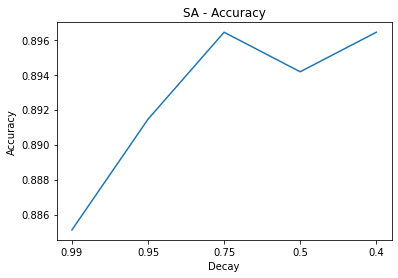

In [42]:
results = None        
with open("SA.json") as f:
    results = json.load(f)

fig, ax = plt.subplots()
ax.set_title("SA - Accuracy")
ax.set_xlabel("Decay")
ax.set_ylabel("Accuracy")
decays = []
times = []
for decay, stats in results.items():
    decays.append(decay)
    times.append(stats['accuracy'])    
ax.plot(decays, times)

plt.savefig("SA_Curve_acc.png")

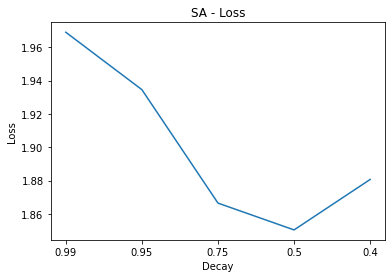

In [41]:
results = None        
with open("SA.json") as f:
    results = json.load(f)

fig, ax = plt.subplots()
ax.set_title("SA - Loss")
ax.set_xlabel("Decay")
ax.set_ylabel("Loss")
decays = []
times = []
for decay, stats in results.items():
    decays.append(decay)
    times.append(stats['loss'])    
ax.plot(decays, times)

plt.savefig("SA_Curve_loss.png")